#  TODO Plotly Treemaps with Dimensions data

* https://plotly.com/python/treemaps/
* https://plotly.com/python-api-reference/generated/plotly.express.treemap.html#plotly.express.treemap


In [2]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

DimCli v0.6.7.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


### Official Example

##### NOTE treemaps required strict hierarchical data - no many 2 many or poli-hierarchy will work! 

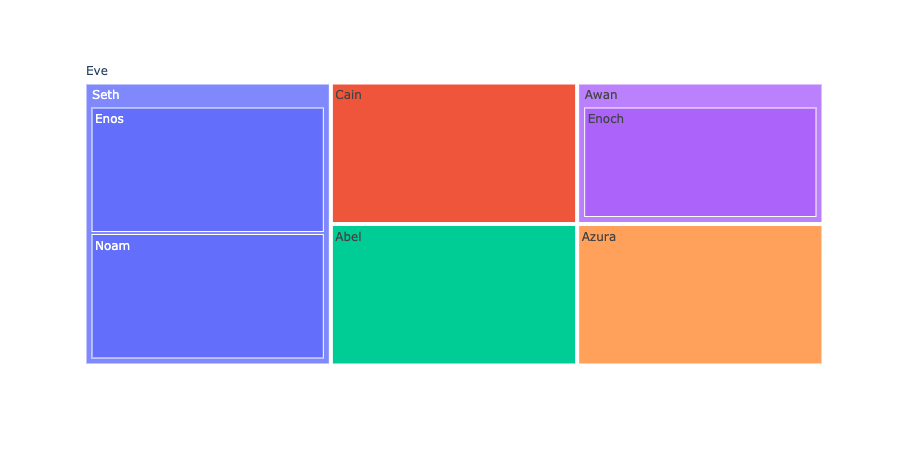

In [3]:
px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)

NOTE the hiearchy seems to have some rules.. changing the second parent to a new name "JACK" breaks it!

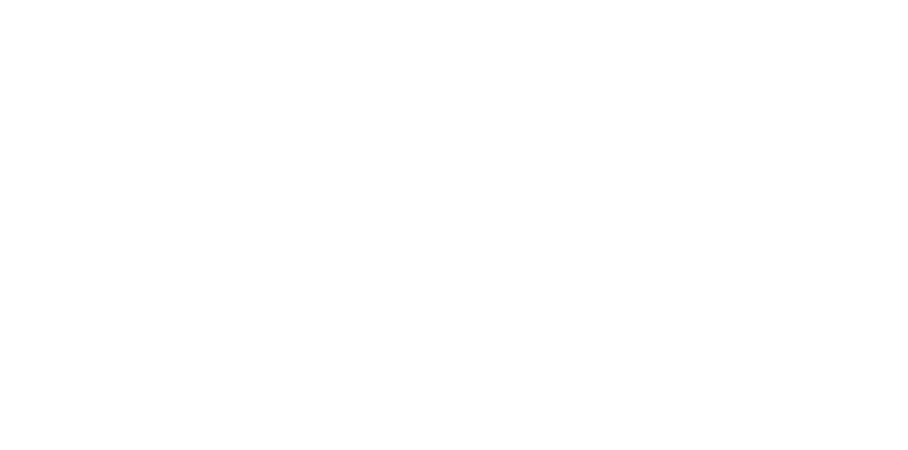

In [63]:
px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Jack", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)

### Testing out plotly_express with DSL data

We can generate some hiearchical data using geographical data

In [7]:
res = dslquery("""search publications 
            for "malaria" 
            where research_org_country_names="Italy" and year < 2010 
            return publications[basics] limit 500""")
df = res.as_dataframe_authors_affiliations()
df = df.fillna("")
df.head(5)

Returned Publications: 500 (total = 4338)
WARNINGS [1]
Field 'author_affiliations' is deprecated in favor of authors. Please refer to https://docs.dimensions.ai/dsl/releasenotes.html for more details


aff_id                      aff_name aff_city  aff_city_id  \
0  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
1  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
2  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
3  grid.416651.1  Istituto Superiore di Sanità     Rome  3.16907e+06   
4    grid.7445.2       Imperial College London   London  2.64374e+06   

      aff_country aff_country_code aff_state aff_state_code          pub_id  \
0           Italy               IT                           pub.1032403232   
1           Italy               IT                           pub.1032403232   
2           Italy               IT                           pub.1032403232   
3           Italy               IT                           pub.1032403232   
4  United Kingdom               GB                           pub.1052568629   

       researcher_id first_name last_name  
0  ur.01364745012.11  Francesco  Severini  
1   ur.0752630273.46    Luciano      Toma  
2   ur.0727445147.51      Marco   Di Luca  
3   ur.0652742326.39    Roberto      Romi  
4  ur.01171100243.77   David W.    Rogers

First let's remove ambiguous data that can't be counted correctly

#### Also we need a numeric field to construct the rectangle sizes

The treemap uses this value to sum up all appearances of the selected hierarchy-levels. 

In [25]:
df = df[df['aff_id'] != ''].copy()
df['tot_researchers'] = df.groupby("aff_id")["researcher_id"].transform("count")

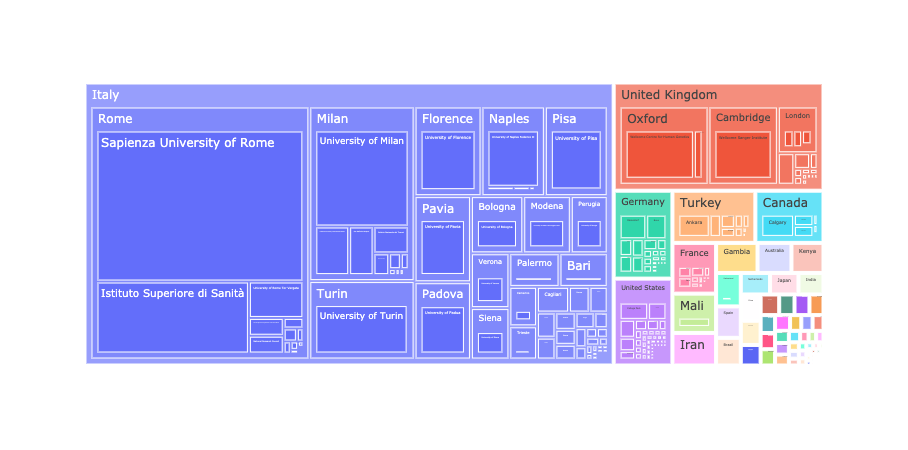

In [30]:
px.treemap(
    df, 
    path=['aff_country', 'aff_city', 'aff_name'], 
    values='tot_researchers',
    hover_data=['aff_id']
)

Simply passing names and parents.. I can't make i work :-(

In [46]:
temp = df.drop_duplicates(subset="aff_id")

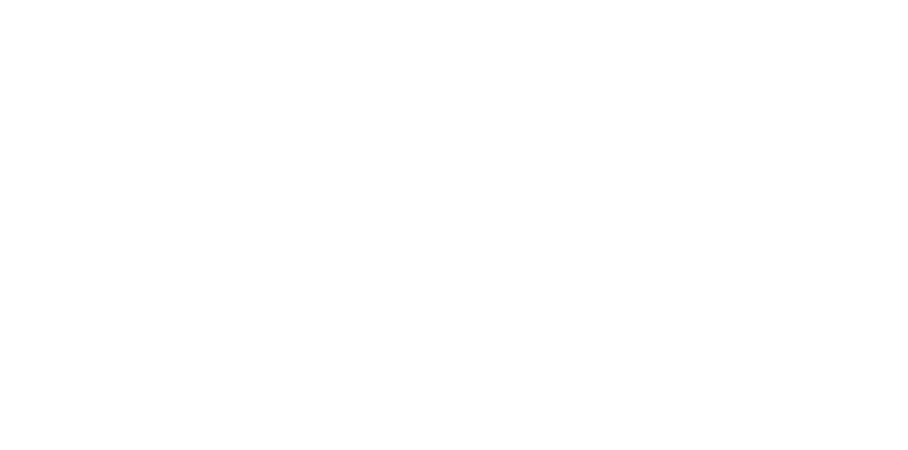

In [64]:
px.treemap(temp,
    names = "aff_id",
    parents = "aff_country"
)

#### but we can fake the 'size' argument to 1 to simply display any hiearchical data

In [65]:
df = df[df['aff_id'] != ''].copy()
df['tot_fake'] = 1

##### here it's simply summing up the 'tot_fake' field for each row 

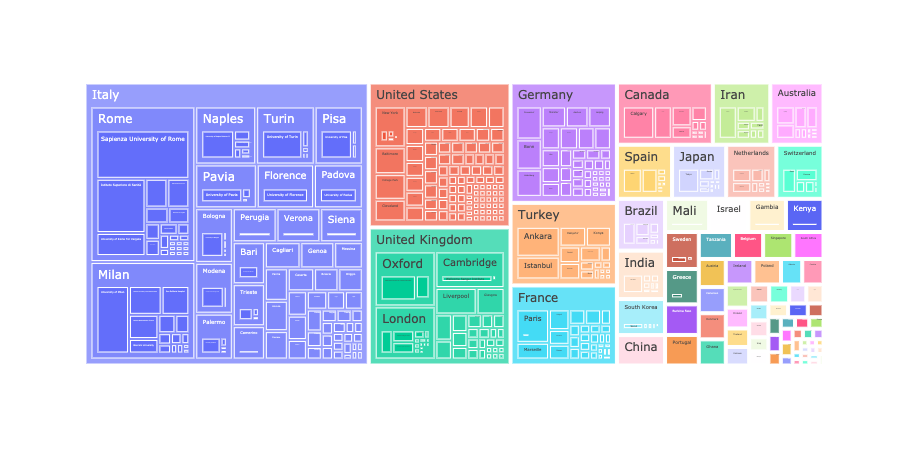

In [66]:
px.treemap(
    df, 
    path=['aff_country', 'aff_city', 'aff_name'], 
    values='tot_fake'
)